## Introduction
The main purpose of this notebook is to build a Machine Learning model intended to predict a laptop price based on its specification. The dataset comes from Kaggle https://www.kaggle.com/datasets/arnabchaki/laptop-price-prediction. It consist of two parts, one is training data (977 records), second is intended for testing (325 records). Each part has 13 data columns.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer,mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.metrics import fbeta_score
random_state=1

In [37]:
def draw_barplot(data,column,figsize=(10,6),palette='Set2',rotate_x_ticks=True):
    plt.figure(figsize=figsize)
    sns.set_style("whitegrid")
    ax=sns.barplot(data=data, x=data[column].value_counts().index, y=data[column].value_counts(),palette=palette)
    ax.bar_label(ax.containers[0])
    ax.set(xlabel=column, ylabel='Count')
    if rotate_x_ticks == True:
        plt.xticks(rotation=90)
    plt.show()

def draw_corr_matrix(data):
    plt.figure(figsize = (15,15))
    sns.heatmap(data.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
    plt.title('Correlation Matrix')
    plt.show()

## Data preparation

In [38]:
df_train=pd.read_csv('data/laptops_train.csv') # train dataset
df_test=pd.read_csv('data/laptops_test.csv') # test dataset

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


Check if duplicates exist.

In [41]:
df_train[df_train.duplicated()]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price


In [42]:
df_test[df_test.duplicated()]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
297,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.2kg,6482268.00
298,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.3kg,4081428.00
299,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,NaN,2.4kg,2569788.00
300,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows,10,2.20kg,3370068.00
301,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.6kg,7993908.00
302,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04kg,4890511.08
303,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,NaN,2.3kg,7166863.08
304,HP,Stream 11-Y000na,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows,10,1.17kg,1858428.00
305,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows,10,2.2kg,6405085.44
306,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00


In [43]:
df_test.drop_duplicates(inplace=True)

In [44]:
df_train.head(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Copy of the data in order for further modifications.

In [45]:
df_train_mod=df_train.copy()
df_test_mod=df_test.copy()

## Data modification

This step is intended to divide the data into more generalized categories and to alter some columns to numeric type.

In [46]:
# Grouping of GPU into the most popular models
def gpu(x):
    x=x.lower()
    if 'intel' in x:
        if 'intel hd graphics' in x:
            return 'Intel HD Graphics'
        elif 'intel iris' in x:
            return 'Intel Iris'
        else:
            return 'Intel-other'
    elif 'nvidia' in x:
        if 'gtx' in x:
            return 'nvidia-gtx-series'
        elif 'mx' in x:
            return 'nvidia-mx-series'
        elif 'quadro' in x:
            return 'nvidia-quadro'
        else:
            return 'nvidia-other'
    elif 'amd' in x:
        if 'pro' in x:
            return 'amd-radeon-pro'
        elif 'r5' in x:
            return 'amd-radeon-r5'
        elif 'r7' in x:
            return 'amd-radeon-r7'
        elif 'rx' in x:
            return 'amd-radeon-rx'
        else:
            return 'amd-radeon-other'
    else:
        return 'other'
    
# Grouping of CPU into most popular models
def processors(x):
    x=x.lower()
    if 'intel' in x:
        if 'i3' in x:
            return 'intel-i3'
        elif 'i5' in x:
            return 'intel-i5'
        elif 'i7' in x:
            return 'intel-i7'
        else:
            return 'intel-other'
    elif 'amd' in x:
        return 'amd'
    else:
        return 'other'

# Unification of storage size and calculation of total storage space
def cond_storage_volume(x):
    if '+' in x:
        x1,x2=x.split('+')[0],x.split('+')[1]
        if 'TB' in x1:
            x1=int(x1.split('TB')[0])*1000
            if 'TB' in x2:
                x2=int(x2.split('TB')[0])*1000
                return x1 + x2
            else:
                x2=int(x2.split('GB')[0])
            return x1 + x2
        elif 'TB' in x2:
            x2=int(x2.split('TB')[0])*1000
            if 'TB' in x1:
                x1=int(x1.split('TB')[0])*1000
                return x1 + x2
            else:
                x1=int(x1.split('GB')[0])
            return x1 + x2
        else:
            x1=int(x1.split('GB')[0])
            x2=int(x2.split('GB')[0])
            return x1 + x2
    else:
        if 'GB' in x:
            return int(x.split('GB')[0])
        else:
            return int(x.split('TB')[0])*1000
    
# Differentiation of storage type
def cond_storage_type(x):
    if '+' in x:
        x1,x2=x.split('+')[0],x.split('+')[0]
        if 'HDD' in x1 and 'HDD' in x2:
            return 'HDD'
        if 'SSD' in x1 and 'SDD' in x2:
            return 'SDD'
        else:
            return 'Hybrid'
    else:    
        if 'SSD' in x:
            return 'SSD'
        elif 'HDD' in x:
            return 'HDD'
        elif 'Hybrid' in x:
            return 'Hybrid'
        else:
            return 'Flash Storage'
        
# Division of screen resolution into categories
def resolution(x):
    x=int(x.split(' ')[-1].split('x')[0])
    if x <= 1366:
        return 'HD_ready'
    elif x == 1920:
        return 'full_HD'
    elif x < 3656:
        return 'HD+'
    else:
        return '4K'

# GPU brand
def GPU_brand(x):
    x=x.lower()
    if 'intel' in x:
        return 'Intel'
    elif 'nvidia' in x:
        return 'Nvidia'
    elif 'amd' in x:
        return 'AMD'
    else:
        return 'other'
    
# CPU brand
def CPU_brand(x):
    x=x.lower()
    if 'intel' in x:
        return 'Intel'
    elif 'amd' in x:
        return 'AMD'
    else:
        return 'other'

Altering selected columns.

In [47]:
# Train data
df_train_mod['GPU model']=df_train_mod['GPU'].apply(gpu)
df_train_mod['GPU brand']=df_train_mod['GPU'].apply(GPU_brand)
df_train_mod['CPU model']=df_train_mod['CPU'].apply(processors)
df_train_mod['CPU brand']=df_train_mod['CPU'].apply(CPU_brand)
df_train_mod['RAM size']=df_train_mod['RAM'].apply(lambda x: x.replace('GB', ''))
df_train_mod['Weight']=df_train_mod['Weight'].apply(lambda x: float(x.split('kg')[0]))
df_train_mod['Resulution']=df_train_mod['Screen'].apply(resolution)
df_train_mod['if IPS']=df_train_mod['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
df_train_mod['if Touchscreen']=df_train_mod['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df_train_mod['Screen Size']=df_train_mod['Screen Size'].apply(lambda x: x.replace('"', ''))
df_train_mod['Storage type']=df_train_mod[' Storage'].apply(cond_storage_type)
df_train_mod['Storage space']=df_train_mod[' Storage'].apply(cond_storage_volume)

# Test data
df_test_mod['GPU model']=df_test_mod['GPU'].apply(gpu)
df_test_mod['GPU brand']=df_test_mod['GPU'].apply(GPU_brand)
df_test_mod['CPU model']=df_test_mod['CPU'].apply(processors)
df_test_mod['CPU brand']=df_test_mod['CPU'].apply(CPU_brand)
df_test_mod['RAM size']=df_test_mod['RAM'].apply(lambda x: x.replace('GB', ''))
df_test_mod['Weight']=df_test_mod['Weight'].apply(lambda x: float(x.split('kg')[0]))
df_test_mod['Resulution']=df_test_mod['Screen'].apply(resolution)
df_test_mod['if IPS']=df_test_mod['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
df_test_mod['if Touchscreen']=df_test_mod['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df_test_mod['Screen Size']=df_test_mod['Screen Size'].apply(lambda x: x.replace('"', ''))
df_test_mod['Storage type']=df_test_mod[' Storage'].apply(cond_storage_type)
df_test_mod['Storage space']=df_test_mod[' Storage'].apply(cond_storage_volume)

In [48]:
df_train_mod.sample(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,...,GPU model,GPU brand,CPU model,CPU brand,RAM size,Resulution,if IPS,if Touchscreen,Storage type,Storage space
957,HP,ProBook x360,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,256GB SSD,Intel HD Graphics 505,Windows,...,Intel HD Graphics,Intel,intel-other,Intel,4,HD_ready,0,1,SSD,256
351,HP,Elitebook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,...,Intel HD Graphics,Intel,intel-i7,Intel,8,full_HD,0,0,SSD,256
240,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,128GB SSD,Intel HD Graphics 520,Windows,...,Intel HD Graphics,Intel,intel-i3,Intel,8,HD_ready,0,0,SSD,128
112,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,...,Intel HD Graphics,Intel,intel-i5,Intel,8,full_HD,1,1,SSD,256
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows,...,Intel HD Graphics,Intel,intel-other,Intel,4,full_HD,1,0,SSD,32


## Data Exploration

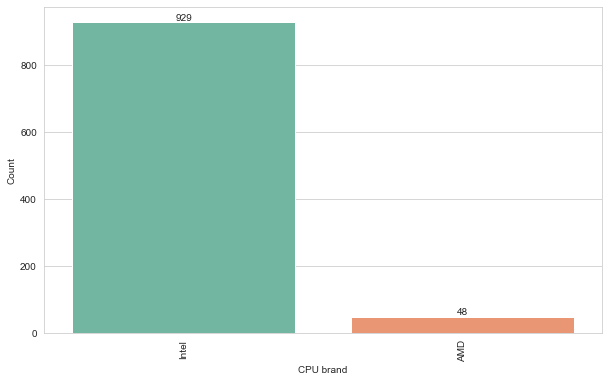

In [49]:
draw_barplot(df_train_mod,'CPU brand')

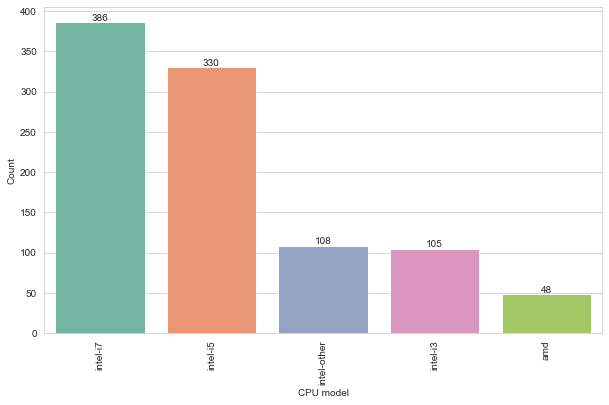

In [50]:
draw_barplot(df_train_mod,'CPU model')

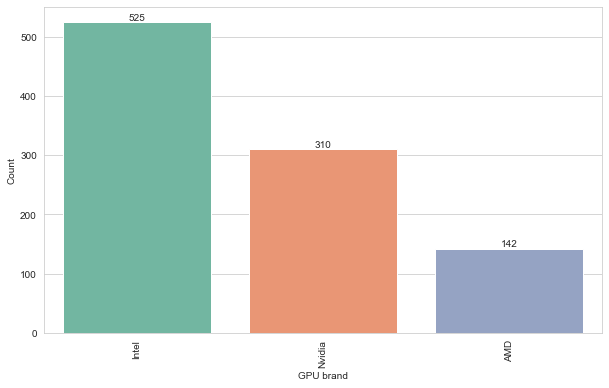

In [51]:
draw_barplot(df_train_mod,'GPU brand')

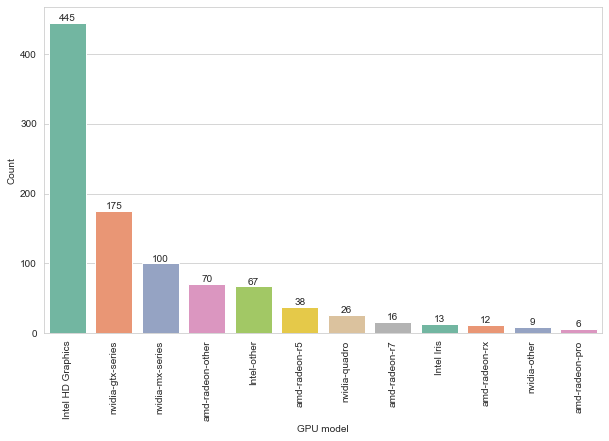

In [52]:
draw_barplot(df_train_mod,'GPU model')

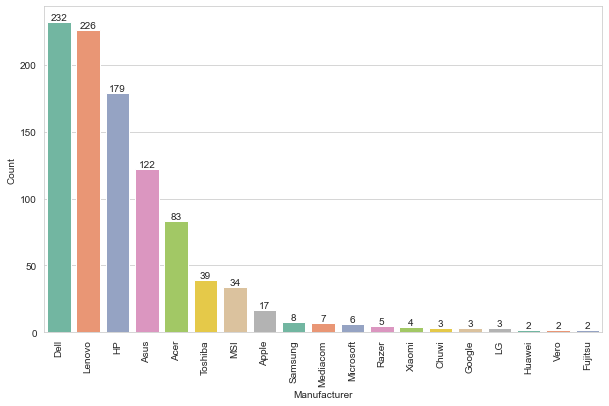

In [53]:
draw_barplot(df_train_mod,'Manufacturer')

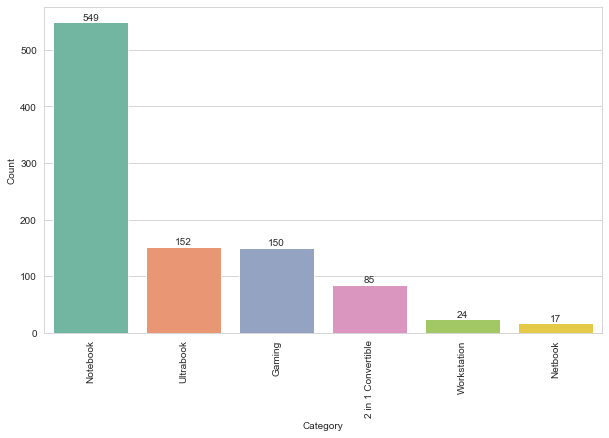

In [54]:
draw_barplot(df_train_mod,'Category')

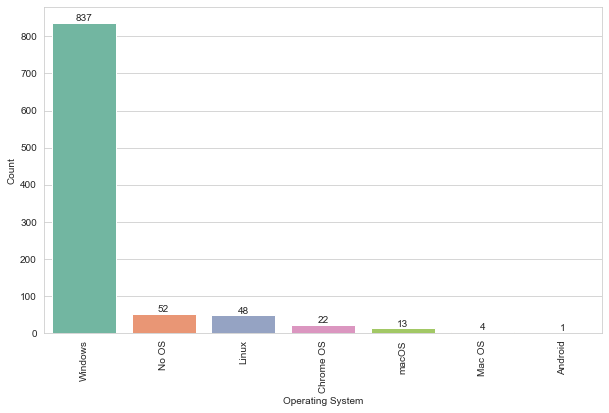

In [55]:
draw_barplot(df_train_mod,'Operating System')

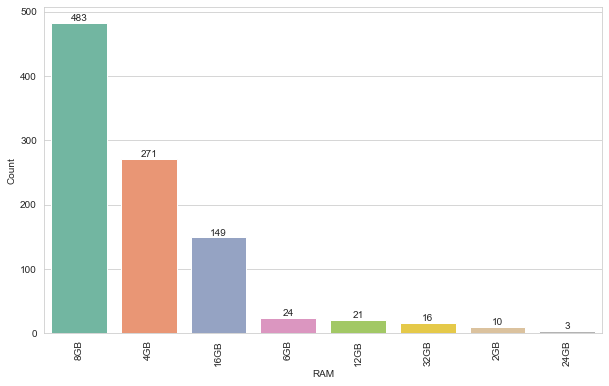

In [56]:
draw_barplot(df_train_mod,'RAM')

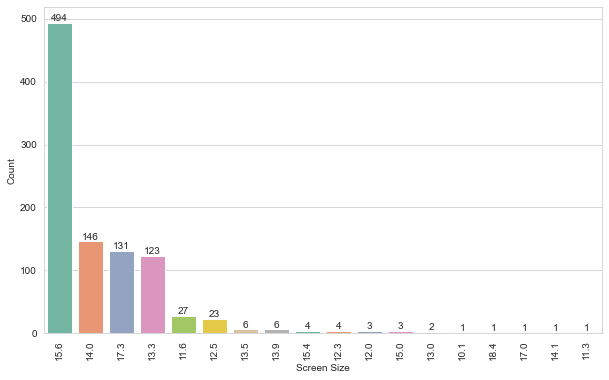

In [57]:
draw_barplot(df_train_mod,'Screen Size')

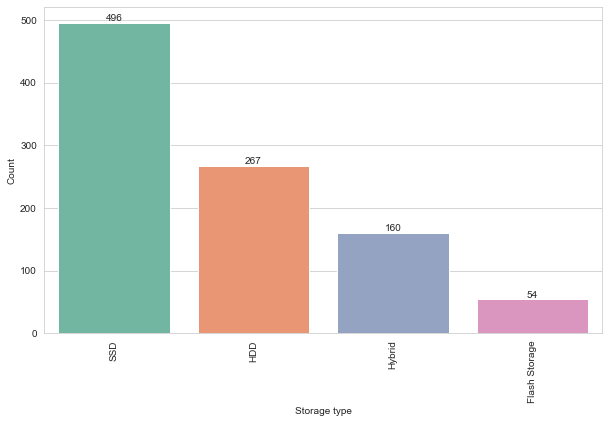

In [58]:
draw_barplot(df_train_mod,'Storage type')

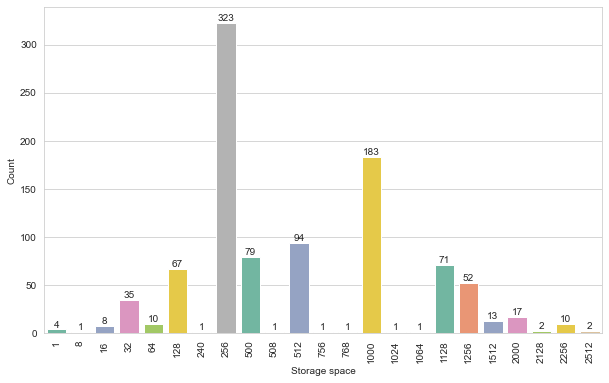

In [59]:
draw_barplot(df_train_mod,'Storage space')

Looks like the most typical laptop should be Notebook Dell with Intel CPU and GPU, Windows OS, 8 GB of RAM, screen size 15,4", 256 SSD storage space.

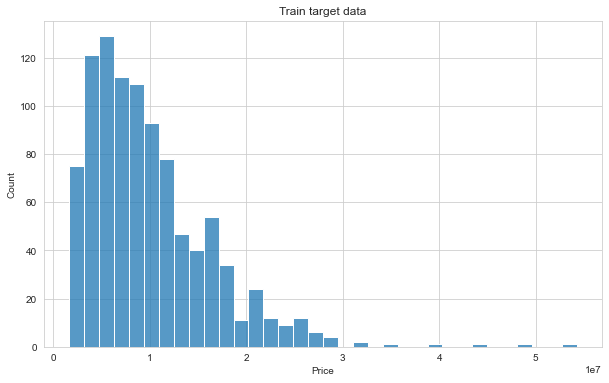

In [60]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=df_train_mod, x=df_train_mod['Price']).set(title='Train target data')
plt.show()

The histogram for training target data is left skewed. Logarithmic transformation could be useful.

---

Some columns require data type modification.

In [61]:
df_train_mod['RAM size']=df_train_mod['RAM size'].astype(dtype=int)
df_train_mod['Weight']=df_train_mod['Weight'].astype(dtype=float)
df_train_mod['Screen Size']=df_train_mod['Screen Size'].astype(dtype=float)

df_test_mod['RAM size']=df_test_mod['RAM size'].astype(dtype=int)
df_test_mod['Weight']=df_test_mod['Weight'].astype(dtype=float)
df_test_mod['Screen Size']=df_test_mod['Screen Size'].astype(dtype=float)

## Encoding category columns

In [62]:
columns=['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System', 'Operating System Version',
       'GPU model','GPU brand', 'CPU model','CPU brand','Resulution','Storage type']

encoder = LabelEncoder()
for column in columns:
    df_train_mod[column] = encoder.fit_transform(df_train_mod[column])
    df_test_mod[column] = encoder.fit_transform(df_test_mod[column])

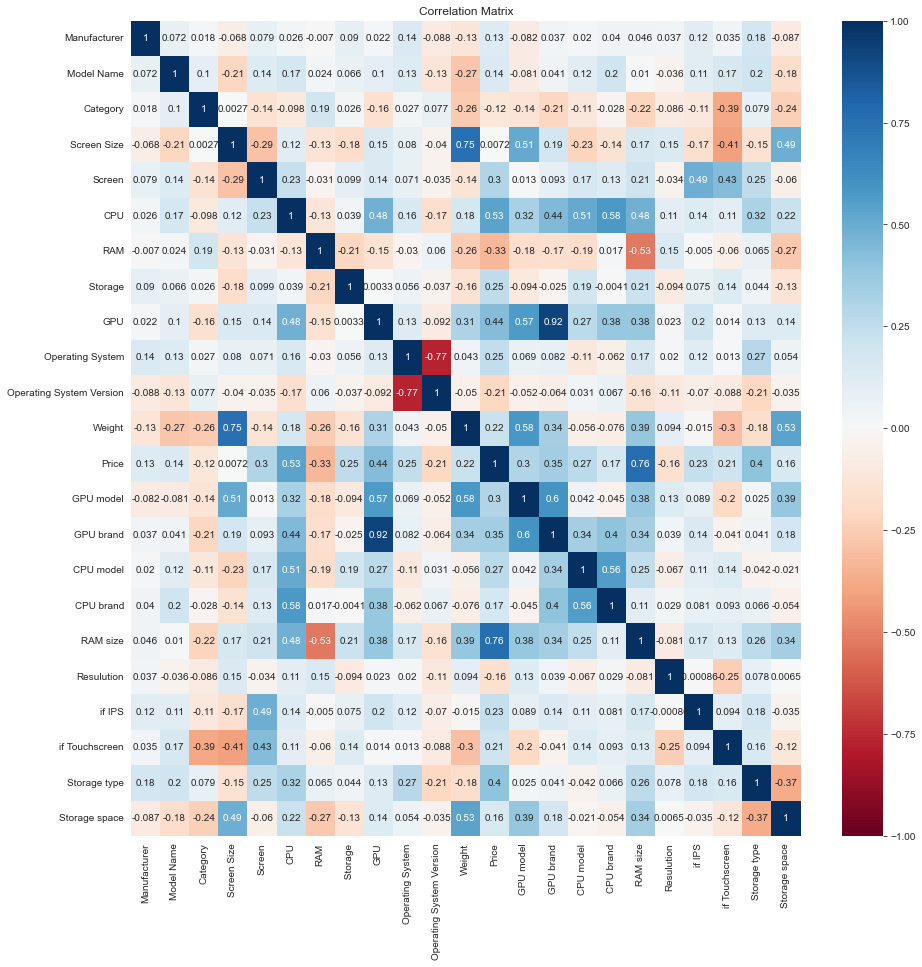

In [63]:
draw_corr_matrix(df_train_mod)

There are columns with the same or similar type of data, therefore some of them should be dropped.

In [64]:
df_train_mod2=df_train_mod.drop(['Model Name', 'Screen','CPU', 'RAM', ' Storage', 'GPU','Operating System Version','GPU brand', 'CPU brand'],axis=1)
df_test_mod2=df_test_mod.drop(['Model Name', 'Screen','CPU', 'RAM', ' Storage', 'GPU','Operating System Version','GPU brand', 'CPU brand'],axis=1)

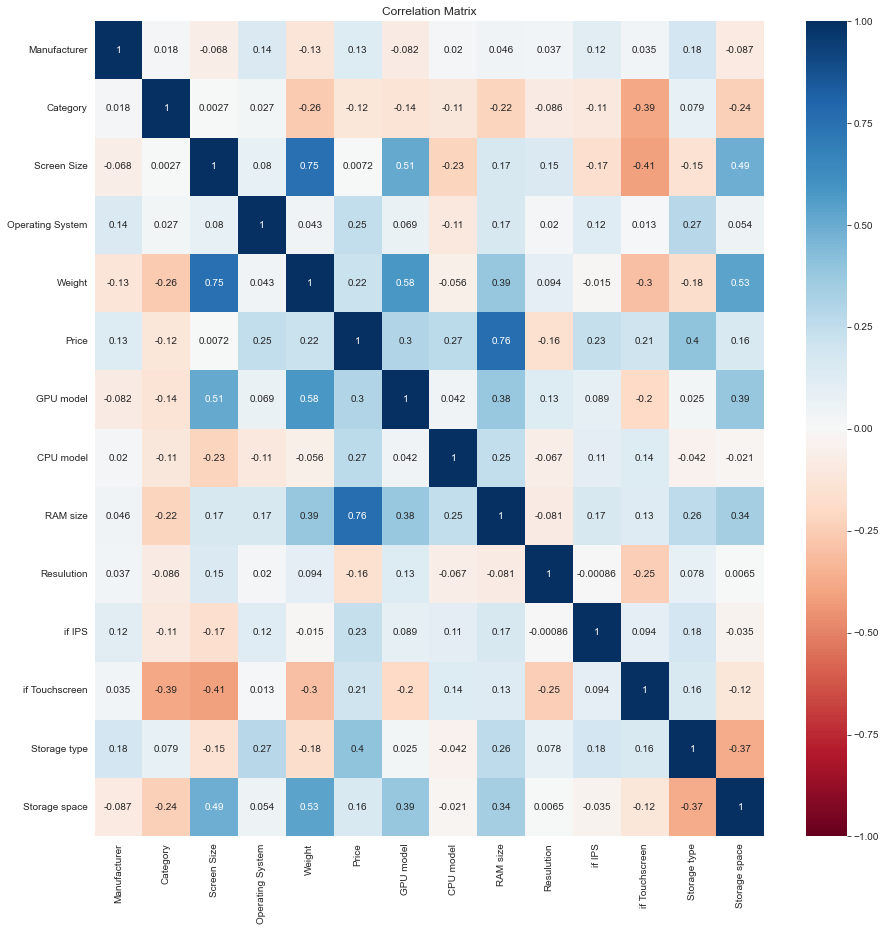

In [65]:
draw_corr_matrix(df_train_mod2)

The price of device is highly correlated with RAM size.

## Preparation to build Machine Learning model

In [66]:
y_train, y_test = df_train_mod2.pop('Price'), df_test_mod2.pop('Price')
X_train, X_test =df_train_mod2, df_test_mod2

Standardization and normalization of the data.

In [67]:
pipeline=Pipeline([
('Std_scaler', StandardScaler()),
('MinMaxScaler', MinMaxScaler())
])

X_train_std=pipeline.fit_transform(X_train)
X_test_std=pipeline.transform(X_test)

X_train_std=pd.DataFrame(X_train_std,columns=X_train.columns,index=X_train.index)
X_test_std=pd.DataFrame(X_test_std,columns=X_test.columns,index=X_test.index)

Transformation of target data to logarithmic distribution.

In [68]:
y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

Comparison of different ML models.

In [69]:
models=[DummyRegressor(),LinearRegression(),DecisionTreeRegressor(max_depth=5,random_state=random_state),RandomForestRegressor(max_depth=5,random_state=random_state)]
for model in models:
    cv_score=cross_val_score(model,X_train_std,y_train_log,cv=5)
    model.fit(X_train_std, y_train_log)
    score=model.score(X_test_std, y_test_log)
    print('Model name: {},\nCV Score: {:.2f}\nScore-R2: {:.2f}\n'.format(model,np.average(cv_score),score))


Model name: DummyRegressor(),
CV Score: -0.05
Score-R2: -0.00

Model name: LinearRegression(),
CV Score: 0.63
Score-R2: 0.57

Model name: DecisionTreeRegressor(max_depth=5, random_state=1),
CV Score: 0.74
Score-R2: 0.67

Model name: RandomForestRegressor(max_depth=5, random_state=1),
CV Score: 0.80
Score-R2: 0.76



The most promising model is Random Forest.

---

## Defining hyperparameters

Searching for the best hyperparameters by means of Grid Search
+ The first step is to pre-define parameters to grid search

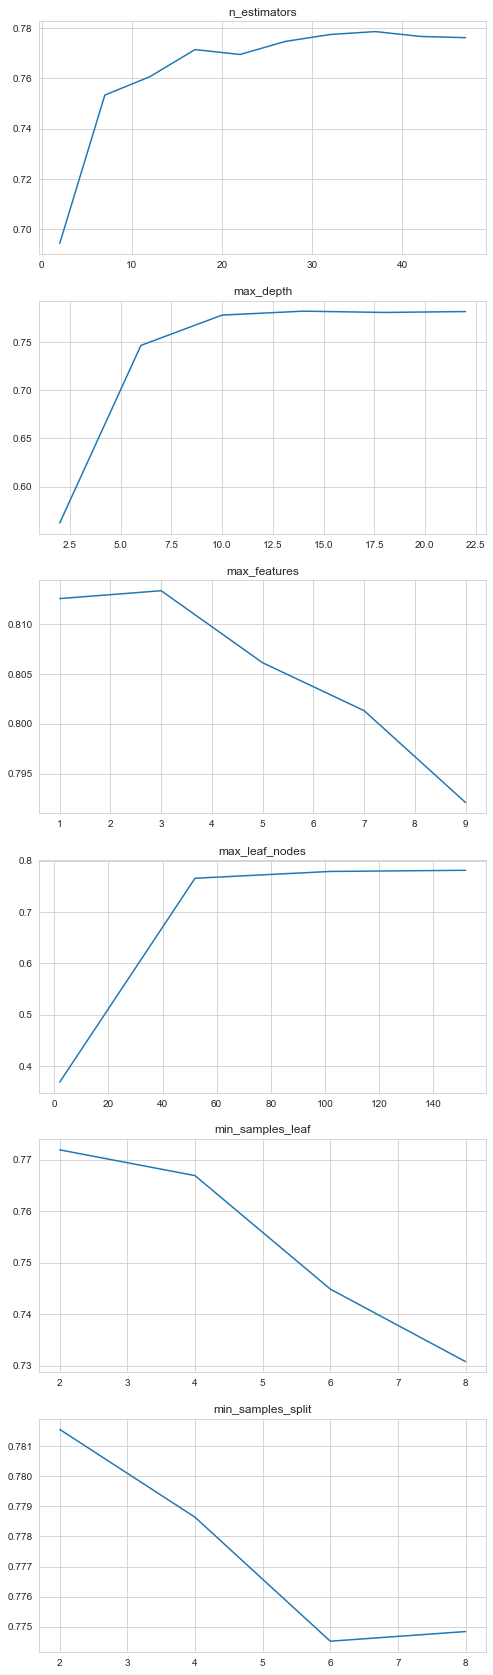

In [70]:
from matplotlib import ticker

pre_grid_params={
'n_estimators':range(2,50,5),
'max_depth':range(2,25,4),
'max_features':range(1,10,2),
'max_leaf_nodes':range(2,155,50),
'min_samples_leaf':range(2,10,2),
'min_samples_split':range(2,10,2),
}


n=0
nb_of_charts=len(pre_grid_params)
fig,axs=plt.subplots(ncols=1,nrows=nb_of_charts,figsize=(8, 5*nb_of_charts))
axs = np.array(axs)
axs = np.reshape(axs, nb_of_charts)
for params,param_values in pre_grid_params.items():
    _scores=list()
    for value in param_values:
        _param=dict()
        _param[params]=value
        forest=RandomForestRegressor(**_param,random_state=random_state)
        cv_score=cross_val_score(forest,X_train_std,y_train,cv=5)
        _scores.append(cv_score.mean())
    axs[n].set_title(params)
    axs[n].plot(param_values, _scores)
    n+=1

The range of hyperparameters were defined based on above plots.

In [71]:
grid_params={
'n_estimators':range(20,30,2),
'max_depth':range(10,17,1),
'max_features':range(1,8,1),
'max_leaf_nodes': [102],
'min_samples_leaf':range(2,6,2),
'min_samples_split':range(2,8,1),
}

In [72]:
forest = RandomForestRegressor(random_state=random_state)
scorer = make_scorer(r2_score)
_search = GridSearchCV(forest, grid_params, cv=5,n_jobs=-1,verbose=3,scoring=scorer)
_search.fit(X_train_std, y_train_log)
_search.best_params_

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


{'max_depth': 11,
 'max_features': 4,
 'max_leaf_nodes': 102,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 28}

## Final Machine Learning model

In [73]:
forest_final = RandomForestRegressor(**_search.best_params_,random_state=random_state)
forest_final.fit(X_train_std, y_train_log)
y_pred = forest_final.predict(X_test_std)
r2_train=r2_score(y_train_log,forest_final.predict(X_train_std))
r2_test=r2_score(y_test_log,y_pred)
print('R2 score from training data: {:.2f}\nR2 score from test data: {:.2f}'.format(r2_train,r2_test))


R2 score from training data: 0.93
R2 score from test data: 0.80


The R2 score for final Random Forest model is 0.8 in case of testing data. The same parameter for training data is 0.93, therefore the model is not overfitted.

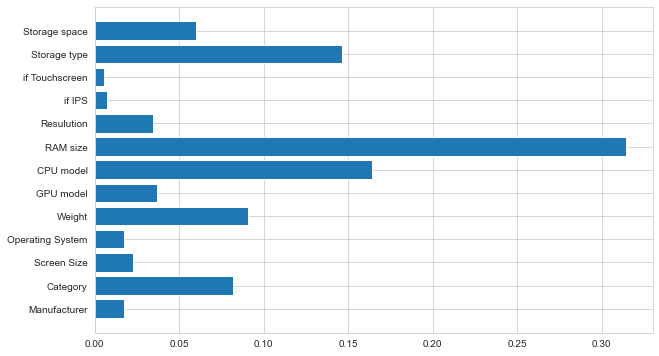

In [74]:
fig=plt.figure(figsize=(10,6))
plt.barh(X_train_std.columns,forest_final.feature_importances_)
plt.show()

The RAM capacity has a major impact on the final price of a laptop. Second important factor is a model of CPU. Such result is not surprising, those two components are one of the most expensive parts of computer.

## Conclusions

This notebook consist of a basic data exploration and feature engineering like value encoding, standardization and normalization. Moreover, four different Machine Learning models were tested, whereas the Random Forest showed the best performance. In order to find optimal hyperparameters, for final Random Forest model, the Grid Search was used. 
The model after tuning of hyperparameters does not tend to be overfitted. The R2 score calculated on testing data reached 0.8. Finally, the feature which has significant influence on a laptop price is a RAM capacity. Other important factors are CPU model and storage type.